这个是算背景噪声互相关的代码，里面主要就一个预处理和互相关

In [1]:
import numpy as np
from scipy import signal
import math
import scipy 
import glob
import os
from DasTools import DasPrep as dp
import nip

import matplotlib.pyplot as plt

import multiprocessing as mp
from functools import partial

In [2]:
import pandas as pd
coors = pd.read_csv('D:\\sustech_dir\\pingshan_active_survey\\pingshan_das_location.csv')
ch_idx = coors['channel number'].values
xch = coors['UTMx']
ych = coors['UTMy']
zch = coors['elevation(m)']

scale_factor = 10000
xch_scale = ((xch-xch[0])*scale_factor).astype('int')
ych_scale = ((ych-ych[0])*scale_factor).astype('int')
zch_scale = ((zch-zch[0])*scale_factor).astype('int')


In [3]:
datapath = 'H:\\pingshan_das\\pingshan_das2\\'

das_files = glob.glob(datapath + '*')
das_files.sort()
das_files

['H:\\pingshan_das\\pingshan_das2\\pingshan_GL_3m_freq_2kHz_sp_05m_UTC_20221105_081618.337.tdms',
 'H:\\pingshan_das\\pingshan_das2\\pingshan_GL_3m_freq_2kHz_sp_05m_UTC_20221105_081648.337.tdms',
 'H:\\pingshan_das\\pingshan_das2\\pingshan_GL_3m_freq_2kHz_sp_05m_UTC_20221105_081718.337.tdms',
 'H:\\pingshan_das\\pingshan_das2\\pingshan_GL_3m_freq_2kHz_sp_05m_UTC_20221105_081748.337.tdms',
 'H:\\pingshan_das\\pingshan_das2\\pingshan_GL_3m_freq_2kHz_sp_05m_UTC_20221105_081818.337.tdms',
 'H:\\pingshan_das\\pingshan_das2\\pingshan_GL_3m_freq_2kHz_sp_05m_UTC_20221105_081848.337.tdms',
 'H:\\pingshan_das\\pingshan_das2\\pingshan_GL_3m_freq_2kHz_sp_05m_UTC_20221105_081918.337.tdms',
 'H:\\pingshan_das\\pingshan_das2\\pingshan_GL_3m_freq_2kHz_sp_05m_UTC_20221105_081948.337.tdms',
 'H:\\pingshan_das\\pingshan_das2\\pingshan_GL_3m_freq_2kHz_sp_05m_UTC_20221105_082018.337.tdms',
 'H:\\pingshan_das\\pingshan_das2\\pingshan_GL_3m_freq_2kHz_sp_05m_UTC_20221105_082048.337.tdms',
 'H:\\pingshan_das\\

In [29]:
tmp = dp.read_das(das_files[0], metadata=True)
# das_files[0]

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk


In [30]:
tmp

{'dt': 0.0005,
 'nt': 60000,
 'dx': 0.5,
 'nch': 1984,
 'GL': 3.0,
 'headers': OrderedDict([('name',
               'pingshan_GL_3m_freq_2kHz_sp_05m_UTC_20221105_081618.337'),
              ('SamplingFrequency[Hz]', 2000.0),
              ('SpatialResolution[m]', 0.5),
              ('Fibre Type', 'Standard'),
              ('Zone Type', 'Single-Zone'),
              ('Start Distance (m)', -0.0561911773600392),
              ('Stop Distance (m)', 1012.2180974311402),
              ('StreamTime[s]', inf),
              ('Continuous Mode', True),
              ('StartPosition[m]', 1.0),
              ('MeasureLength[m]', 992),
              ('Zone Setup', False),
              ('Precise Sampling Frequency (Hz)', 32000.0),
              ('Zones', ''),
              ('Power Decrement', 0.0),
              ('Source Mode', 'Normal'),
              ('Time Decimation', 16),
              ('OutputDecimation[bool]', 2),
              ('P', 7),
              ('P Coefficients',
               '1.0

In [42]:
## tn and sn preprocessing. Run it once only. 


%%time

tnsn_path = 'H:\\pingshan_das\\tnsn_das\\'

M = 5
ch1, ch2 = 0, 1650

metadata = dp.read_das(das_files[0], metadata=True)
dt = metadata['dt'] * M

for i in range(len(das_files)):
    readname = das_files[i]
    data = dp.read_das(readname, ch1=ch1, ch2=ch2)

    data = signal.decimate(data, M, axis=1)
    data = dp.das_preprocess(data)
    data = time_norm(data, dt, fl=5, fh=160)
    data = spec_norm(data)

    savename = tnsn_path + 'tnsn_' + os.path.basename(readname).strip('.tdms') + '.npy'
    np.save(savename, data.astype('float32'))

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 238080000 is not a multiple of the chunk size 1047552. Will attempt to 

Wall time: 10h 7min 10s


In [4]:
tnsn_path = 'H:\\pingshan_das\\tnsn_das\\'

tnsn_files = glob.glob(tnsn_path+'*.npy')
tnsn_files.sort()
tnsn_files

['H:\\pingshan_das\\tnsn_das\\tnsn_pingshan_GL_3m_freq_2kHz_sp_05m_UTC_20221105_081618.337.npy',
 'H:\\pingshan_das\\tnsn_das\\tnsn_pingshan_GL_3m_freq_2kHz_sp_05m_UTC_20221105_081648.337.npy',
 'H:\\pingshan_das\\tnsn_das\\tnsn_pingshan_GL_3m_freq_2kHz_sp_05m_UTC_20221105_081718.337.npy',
 'H:\\pingshan_das\\tnsn_das\\tnsn_pingshan_GL_3m_freq_2kHz_sp_05m_UTC_20221105_081748.337.npy',
 'H:\\pingshan_das\\tnsn_das\\tnsn_pingshan_GL_3m_freq_2kHz_sp_05m_UTC_20221105_081818.337.npy',
 'H:\\pingshan_das\\tnsn_das\\tnsn_pingshan_GL_3m_freq_2kHz_sp_05m_UTC_20221105_081848.337.npy',
 'H:\\pingshan_das\\tnsn_das\\tnsn_pingshan_GL_3m_freq_2kHz_sp_05m_UTC_20221105_081918.337.npy',
 'H:\\pingshan_das\\tnsn_das\\tnsn_pingshan_GL_3m_freq_2kHz_sp_05m_UTC_20221105_081948.337.npy',
 'H:\\pingshan_das\\tnsn_das\\tnsn_pingshan_GL_3m_freq_2kHz_sp_05m_UTC_20221105_082018.337.npy',
 'H:\\pingshan_das\\tnsn_das\\tnsn_pingshan_GL_3m_freq_2kHz_sp_05m_UTC_20221105_082048.337.npy',
 'H:\\pingshan_das\\tnsn_das\\

In [4]:
%%time

CC = np.zeros(nip.XCORR_vshot_arr_partial(tnsn_files[0]).shape)

p = mp.Pool(20)   #开N个进程
for CC_single in p.imap_unordered(nip.XCORR_vshot_arr_partial, tnsn_files[:1860]):
    CC += CC_single

Wall time: 4h 37min 55s


In [5]:
CC.shape

(63, 1650, 3999)

In [11]:
dt = 0.0025

<IPython.core.display.Javascript object>


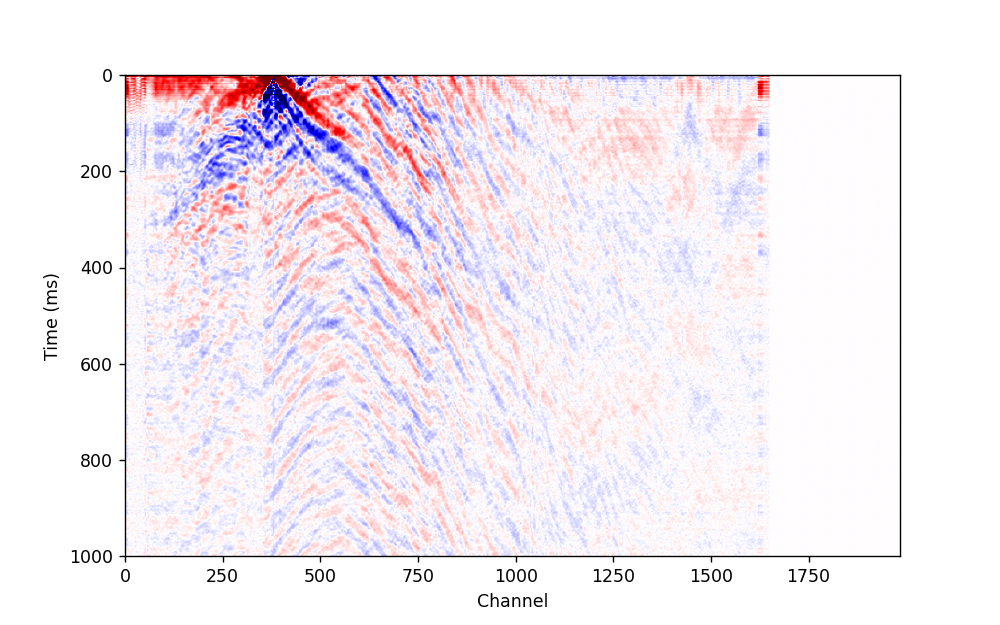

Text(0.5, 0, 'Channel')

In [57]:
%matplotlib notebook

plt.figure(figsize=[8,5])

# CC_filt = dp.bandpass(CC[33,:,:], nip.dt, fl=5, fh=160)
# CC_filt = dp.bandpass(CC[7,:,:], nip.dt, fl=5, fh=160)

# CC_filt = dp.bandpass(CC[24,:,:], nip.dt, fl=0.1, fh=160)
# CC_filt = dp.bandpass(CC[7,:,:], nip.dt, fl=0.1, fh=160)


CC_filt = np.pad(CC_filt, [[0, 1984-CC_filt.shape[0]],[0,0]], constant_values=0)
clim = CC_filt.std() * 10
plt.imshow(CC_filt[:,:].T, aspect='auto', cmap='seismic', vmin=-clim, vmax=clim, 
           extent=[0,  1984, CC.shape[-1]*dt/2*1000, -CC.shape[-1]*dt/2*1000])

plt.ylim([1000,0])
plt.ylabel('Time (ms)')
plt.xlabel('Channel')

<IPython.core.display.Javascript object>


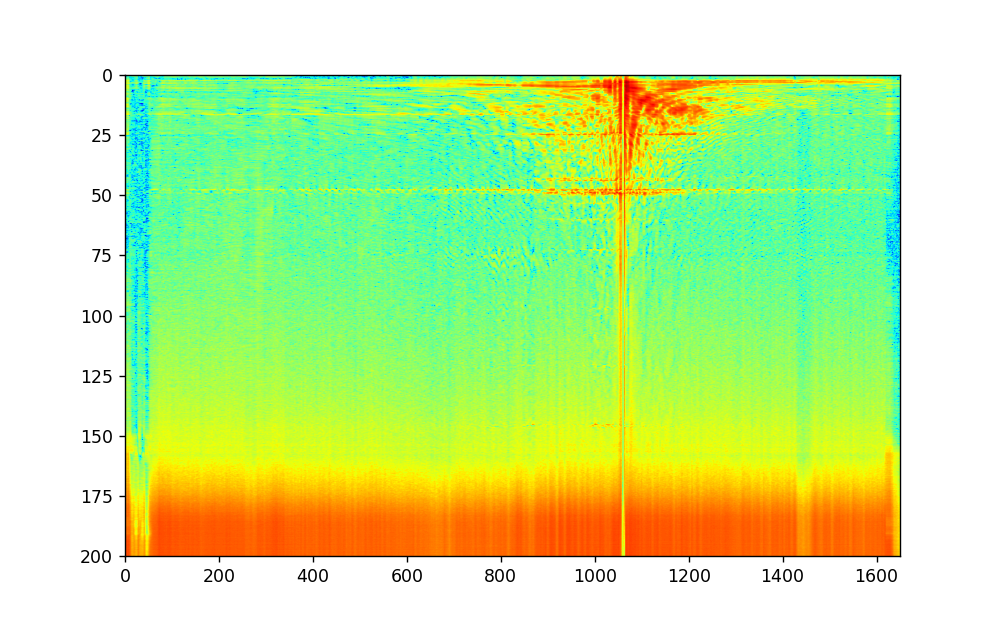

In [74]:
data_fft = abs(np.fft.rfft(CC[24,:,2000:4000], axis=1))

plt.figure(figsize=[8,5])
plt.imshow(np.log10(data_fft).T, aspect='auto', cmap='jet', vmin=0, vmax=3,
          extent=[ 0, data_fft.shape[0], 200,0])


In [60]:
CC.shape

(38, 1650, 3999)

In [62]:
1/0.0025

400.0

In [17]:
CC_save = np.copy(CC)
CC_save.shape

In [18]:
# np.save('CC_vshot_start100_end1601_step40.npy', CC_save)

In [5]:
CC = np.load('CC_vshot_start100_end1601_step40.npy')

In [6]:
%%time

import segyio

savepath = 'H:\\pingshan_das\\das_noise_cc_segy\\'

for ishot in range(CC.shape[0]):
    
    CC_slice = CC[ishot,ch_idx.min():ch_idx.max()+1,:]
    
    
    savename = savepath + 'das_noise_cc_'+str(int(nip.ivs_arr[ishot]))+'.segy'
    segyio.tools.from_array2D(savename, CC_slice, dt = nip.dt*1e6)
    
    # add geometry info (with a scale factor)
    with segyio.open(savename,'r+') as f:
        for irel, x in enumerate(f.header):
            x.update({segyio.TraceField.TraceNumber: ch_idx[irel],
                      segyio.TraceField.GroupX: xch_scale[irel], 
                      segyio.TraceField.GroupY: ych_scale[irel],
                      segyio.TraceField.ReceiverGroupElevation: zch_scale[irel],
                      segyio.TraceField.SourceGroupScalar: -int(scale_factor)})



C:\ProgramData\Anaconda3\lib\site-packages\segyio\utils.py:23: RuntimeWarning: Implicit conversion from float64 to float32 (narrowing)
  warnings.warn(msg.format(x.dtype, dtype), RuntimeWarning)


Wall time: 1min 2s


In [144]:
# with segyio.open(savepath+'das_noise_cc_100.segy','r+') as f:
#     print(f.tracecount)
#     for irel, x in enumerate(f.header):
#         x.update({segyio.TraceField.TraceNumber: ch_idx[irel],
#                   segyio.TraceField.GroupX: xch_scale[irel], 
#                   segyio.TraceField.GroupY: ych_scale[irel],
#                   segyio.TraceField.ReceiverGroupElevation: zch_scale[irel],
#                   segyio.TraceField.SourceGroupScalar: -int(scale_factor)})

1257


In [139]:
with segyio.open(savepath+'das_noise_cc_100.segy','r+') as f:
#     print(f.keys())
    print(f.header[100])

{TRACE_SEQUENCE_LINE: 0, TRACE_SEQUENCE_FILE: 0, FieldRecord: 0, TraceNumber: 461, EnergySourcePoint: 0, CDP: 0, CDP_TRACE: 100, TraceIdentificationCode: 0, NSummedTraces: 0, NStackedTraces: 0, DataUse: 0, offset: 1, ReceiverGroupElevation: 0, SourceSurfaceElevation: 0, SourceDepth: 0, ReceiverDatumElevation: 0, SourceDatumElevation: 0, SourceWaterDepth: 0, GroupWaterDepth: 0, ElevationScalar: 0, SourceGroupScalar: 0, SourceX: 0, SourceY: 0, GroupX: 407187, GroupY: -306880, CoordinateUnits: 10000, WeatheringVelocity: 0, SubWeatheringVelocity: 0, SourceUpholeTime: 0, GroupUpholeTime: 0, SourceStaticCorrection: 0, GroupStaticCorrection: 0, TotalStaticApplied: 0, LagTimeA: 0, LagTimeB: 0, DelayRecordingTime: 0, MuteTimeStart: 0, MuteTimeEND: 0, TRACE_SAMPLE_COUNT: 3999, TRACE_SAMPLE_INTERVAL: 2500, GainType: 0, InstrumentGainConstant: 0, InstrumentInitialGain: 0, Correlated: 0, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, SweepType: 0, SweepTraceTaperLengthStart: 0, Sweep

In [81]:
coors['channel number'].values.shape

(1257,)

In [76]:
coors

,channel number,UTMx,UTMy,elevation(m)
0,361,2.511550e+06,527972.306000,50.117000
1,362,2.511550e+06,527972.066754,50.115133
2,363,2.511551e+06,527971.773843,50.112846
3,364,2.511551e+06,527971.480932,50.110560
4,365,2.511552e+06,527971.188021,50.108273
...,...,...,...,...
1252,1613,2.512059e+06,527588.029562,40.325059
1253,1614,2.512059e+06,527587.696633,40.320134
1254,1615,2.512059e+06,527587.349289,40.314393
1255,1616,2.512060e+06,527587.001946,40.308652


In [69]:
coor.shape

(359, 5)

In [87]:
with segyio.open(savepath+'das_noise_cc_100.segy','r') as f:
    print(f.tracecount)
#     print(f.attributes(segyio.TraceField.GroupY)[:])

1650


<IPython.core.display.Javascript object>


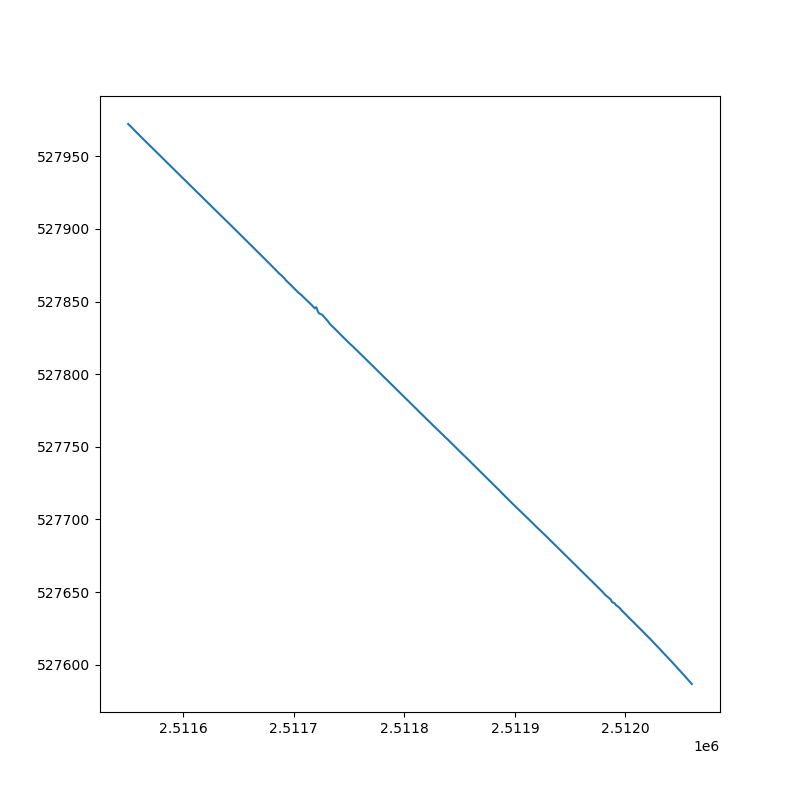

In [71]:
coors = pd.read_csv('D:\\sustech_dir\\pingshan_active_survey\\pingshan_das_location.csv')

plt.figure(figsize=[8,8])
plt.plot(coors['UTMx'], coors['UTMy'])

In [109]:
((coors['UTMx'].values-coors['UTMx'].values[0])*10000).astype('int')

array([      0,    3423,    7615, ..., 5092825, 5096578, 5100331])

<IPython.core.display.Javascript object>


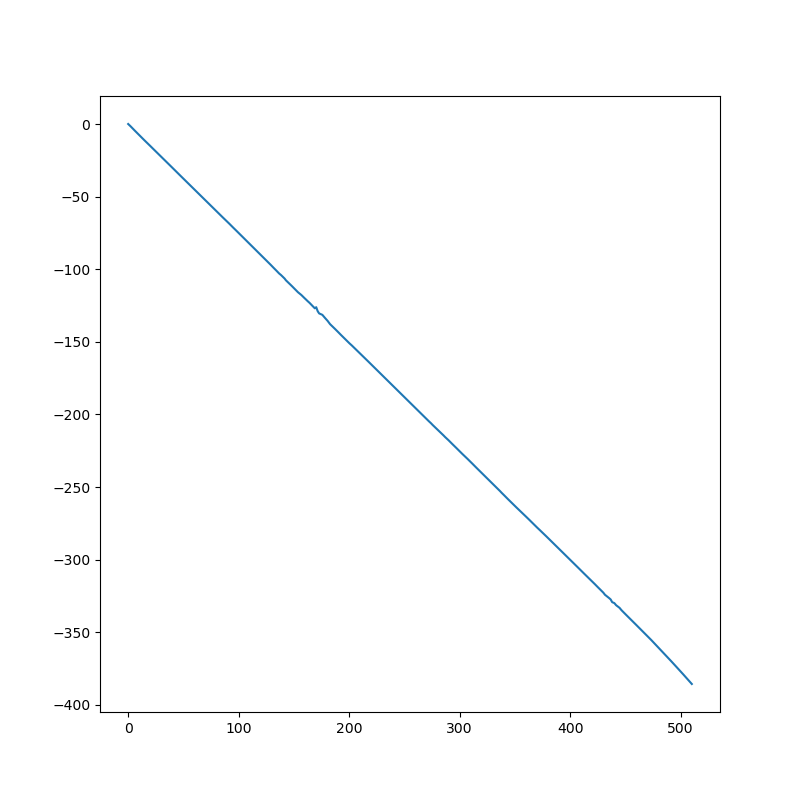

In [151]:
with segyio.open(savepath+'das_noise_cc_100.segy','r+') as f:
    scale = f.attributes(segyio.TraceField.CoordinateUnits)[:]
    gx = f.attributes(segyio.TraceField.GroupX)[:] / scale
    gy = f.attributes(segyio.TraceField.GroupY)[:] / scale

plt.figure(figsize=[8,8])
plt.plot(gx, gy)

In [156]:
np.sqrt(xch_scale.max()**2+abs(ych_scale).max()**2)

6394221.518584573